In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

import os

In [9]:
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/Live.csv


# ETL

In [8]:
import warnings

warnings.filterwarnings('ignore')

In [18]:
data = 'data/Live.csv'
df = pd.read_csv(data, engine="pyarrow")

In [21]:
print(f'Dimensionalidad: {df.shape[0]}x{df.shape[1]}')

Dimensionalidad: 7050x16


In [23]:
df.sample(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
1218,246675545449582_742505282533270,video,4/24/2015 4:26,2374,8,9,2374,0,0,0,0,0,NaN,NaN,NaN,NaN
4609,725980084255106_841076602745453,status,3/30/2018 1:46,1394,239,7,1365,8,21,0,0,0,NaN,NaN,NaN,NaN
752,246675545449582_940589126058217,photo,4/23/2016 5:03,534,0,0,526,5,2,0,0,1,NaN,NaN,NaN,NaN
1128,246675545449582_798726310244500,photo,8/14/2015 23:34,2264,284,78,2264,0,0,0,0,0,NaN,NaN,NaN,NaN
6735,1050855161656896_1410390842369991,video,10/2/2017 12:19,163,3392,114,122,24,3,7,7,0,NaN,NaN,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [25]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [26]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [40]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [27]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


# EDA

<Axes: ylabel='num_reactions'>

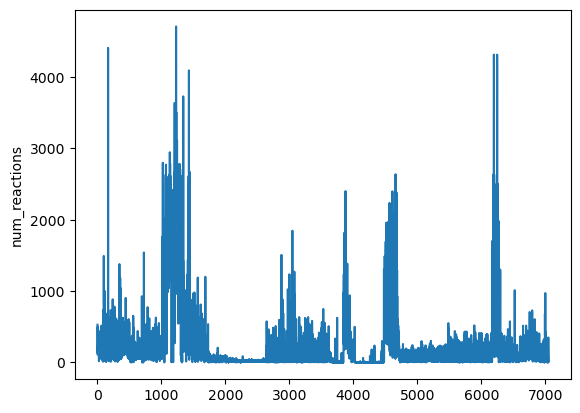

In [33]:
sns.lineplot(data=df['num_reactions'])

<Axes: ylabel='num_sads'>

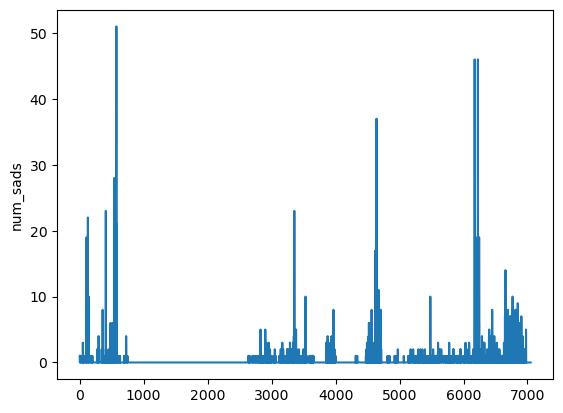

In [34]:
sns.lineplot(data=df['num_sads'])

<Axes: ylabel='num_comments'>

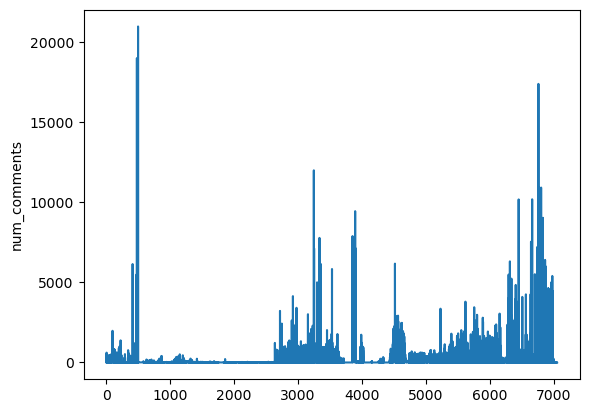

In [35]:
sns.lineplot(data=df['num_comments'])

In [39]:
list(df['status_type'].unique())

['video', 'photo', 'link', 'status']

# Escalado y preprocesamiento de datos

In [73]:
X, y = df, df['status_type']

In [74]:
from sklearn.preprocessing import LabelEncoder

Convertimos las variables categóricas en numéricas

In [75]:
le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

In [76]:
columnas: np.array = X.columns

In [78]:
type(X)

numpy.ndarray

El proceso de escalado se utiliza comúnmente en el preprocesamiento de datos para ajustar las características dentro de un rango específico, generalmente entre 0 y 1 o -1 y 1, manteniendo la proporción relativa entre ellas.

In [79]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [80]:
X = pd.DataFrame(X, columns=[columnas])

In [81]:
type(X)

pandas.core.frame.DataFrame

# KMeans

In [82]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [83]:
kmeans.cluster_centers_

array([[9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03],
       [3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03]])

In [88]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

porcentaje: int = round(correct_labels / y.size * 100, 3)
print(f'{porcentaje}% de las etiquetas fueron correctamente etiquetadas.')

60.823% de las etiquetas fueron correctamente etiquetadas.


## Método del codo
Graficamos la función de costo

kmeans.inertia_ es un atributo de un modelo KMeans en la biblioteca scikit-learn de Python. Representa la suma de las distancias al cuadrado de cada punto de datos dentro de su respectivo cluster, en relación con el centroide de ese cluster.

En términos simples, kmeans.inertia_ proporciona una medida de la dispersión de los puntos de datos dentro de los clusters encontrados por el modelo KMeans. Cuanto menor sea el valor de inertia_, más compactos y cohesivos serán los clusters, ya que indica que los puntos de datos están más cerca de sus centroides respectivos. Por lo tanto, se utiliza como una métrica para evaluar qué tan bien se ajustan los datos al modelo de clusteri

En el siguiente gráfico el pliegue está en






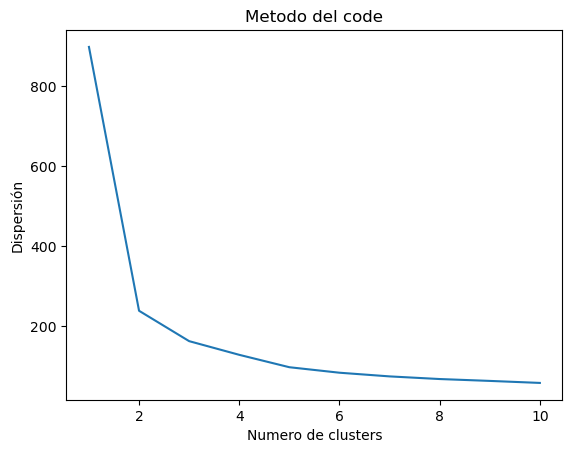

In [90]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++',
                    max_iter = 300,
                    n_init = 10,
                    random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
    
plt.plot(range(1, 11), cs)
plt.title('Metodo del code')
plt.xlabel('Numero de clusters')
plt.ylabel('Dispersión')
plt.show()

$$|\frac{d}{dx}(f(x)-\alpha)-\frac{d}{dx}(f(x)+\alpha)|$$ 
$$donde$$ 
$$\alpha \approx 0$$

In [93]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,
                random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

correct_labels = sum(y == labels)

porcentaje: int = round(correct_labels / y.size * 100, 3)

print(f'{porcentaje}% de las etiquetas fueron correctamente etiquetadas.')
print('Puntaje de presición: {0:0.2f}'. format(correct_labels/float(y.size)))

60.823% de las etiquetas fueron correctamente etiquetadas.
Puntaje de presición: 0.61


In [98]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7,
                random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

correct_labels = sum(y == labels)

porcentaje: int = round(correct_labels / y.size * 100, 3)

print(f'{porcentaje}% de las etiquetas fueron correctamente etiquetadas.')
print('Puntaje de presición: {0:0.2f}'. format(correct_labels/float(y.size)))

1.461% de las etiquetas fueron correctamente etiquetadas.
Puntaje de presición: 0.01


# Conclusiones
En este proyecto, he implementado la técnica de clustering no supervisado más popular llamada Clustering K-Means.

He aplicado el método del codo y encontré que k=2 (donde k es el número de clusters) puede considerarse un buen número de clusters para agrupar estos datos.

Observé que el modelo tiene una inercia muy alta de 237.7572. Por lo tanto, este modelo no se ajusta bien a los datos.

Logré una débil precisión de clasificación del 1% con k=2 utilizando nuestro modelo no supervisado.

Así que cambié el valor de k y encontré una precisión de clasificación relativamente mayor del 62% con k=4.

Por lo tanto, podemos concluir que k=4 es el número óptimo de clusters.